In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [170]:
data = pd.read_csv("C:\\Users\omerl\OneDrive\Documents\GitHub\Data_challenge_IML\data_frame_final_1.csv")
print(data.columns)
print(data.head(10))
data.drop(['Unnamed: 0'], axis=1, inplace=True)
# print the count of missing values in each column
for col in data.columns:
    print(col, data[col].isnull().sum())
data.drop(['hotel_brand_code','hotel_chain_code', 'hotel_city_code'], axis=1, inplace=True)
# drop all the rows with missing values
data.dropna(inplace=True)
print(data.info())
print(data.columns)


Index(['Unnamed: 0', 'booking_datetime', 'checkin_date', 'hotel_star_rating',
       'charge_option', 'guest_is_not_the_customer', 'no_of_adults',
       'no_of_children', 'request_extra_bed', 'no_of_room',
       'original_selling_amount', 'original_payment_type', 'is_user_logged_in',
       'is_first_booking', 'number_of_requests', 'cancellation_datetime',
       'hotel_brand_code', 'hotel_chain_code', 'hotel_city_code',
       'is_cancelled', 'cancel_policy_365D100P_100P', 'Lead_day', 'stay_len',
       'origin_country_code_HK', 'origin_country_code_MO',
       'origin_country_code_MY', 'origin_country_code_TH',
       'guest_national_Hong Kong', 'guest_national_Macau',
       'guest_national_Malaysia', 'guest_national_Thailand',
       'type_hotel_Serviced Apartment'],
      dtype='object')
   Unnamed: 0     booking_datetime         checkin_date  hotel_star_rating  \
0           0  2018-06-28 21:15:00  2018-07-09 00:00:00                4.0   
1           1  2018-08-10 22:31:00  20

In [171]:
# cleaning the data remove missing values and duplicates
data['cancellation_datetime'] = data['cancellation_datetime'].fillna('2022-02-01')
data['cancellation_datetime'] = pd.to_datetime(data['cancellation_datetime'])
filtered_df = data.loc[(data['cancellation_datetime'] <= '2018-09-29') | (data['cancellation_datetime'] == '2022-02-01')]
filtered_df['booking_datetime'] = filtered_df['booking_datetime'].apply(pd.to_datetime)
filtered_df['is_cancelled'] = (filtered_df['cancellation_datetime'] - filtered_df['booking_datetime']).dt.days
filtered_df['is_cancelled'] = filtered_df['is_cancelled'].apply(lambda x: 1 if x<=44 and x >=35 else 0)
filtered_df.drop(['cancellation_datetime', 'booking_datetime', 'checkin_date'], axis=1, inplace=True)
data = filtered_df

In [172]:
y = data['is_cancelled']
X = data.drop(['is_cancelled'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43941, 24) (14647, 24) (43941,) (14647,)


In [173]:
# SVM classifier

In [174]:
# from sklearn.svm import SVC
# model_SVC = SVC(kernel = 'rbf', random_state = 4)
# model_SVC.fit(X_train, y_train)
#
# y_pred_svm = model_SVC.predict_proba(X_test)

In [175]:
# Logistic Classifier

In [176]:
# from sklearn.linear_model import LogisticRegression
# model_logistic = LogisticRegression()
# model_logistic.fit(X_train, y_train)
#
# y_pred_logistic = model_logistic.predict_proba(X_test)

In [177]:
#k nearest neighbors

In [178]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict_proba(X_test)

In [179]:
# boosting random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,criterion='entropy')
forest.fit(X_train, y_train)
y_pred_forest = forest.predict_proba(X_test)

# Accuracy on Test
print("Training Accuracy is: ", forest.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", forest.score(X_test, y_test))


from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [10, 20, 30, 40, 50]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion='entropy',
                                max_features=f,
                                max_depth=d,
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

Training Accuracy is:  0.9999317266334403
Testing Accuracy is:  0.9926947497781116
Classification accuracy on test set with max features = 1 and max_depth = 10: 0.992
Classification accuracy on test set with max features = 1 and max_depth = 20: 0.993
Classification accuracy on test set with max features = 1 and max_depth = 30: 0.993
Classification accuracy on test set with max features = 1 and max_depth = 40: 0.992
Classification accuracy on test set with max features = 1 and max_depth = 50: 0.992
Classification accuracy on test set with max features = sqrt and max_depth = 10: 0.992
Classification accuracy on test set with max features = sqrt and max_depth = 20: 0.993
Classification accuracy on test set with max features = sqrt and max_depth = 30: 0.993
Classification accuracy on test set with max features = sqrt and max_depth = 40: 0.993
Classification accuracy on test set with max features = sqrt and max_depth = 50: 0.993
Classification accuracy on test set with max features = log2 a

In [180]:
#k random forest

In [181]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,criterion='entropy')
forest.fit(X_train, y_train)
y_pred_forest = forest.predict_proba(X_test)

In [182]:
#Plot ROC and compare AUC

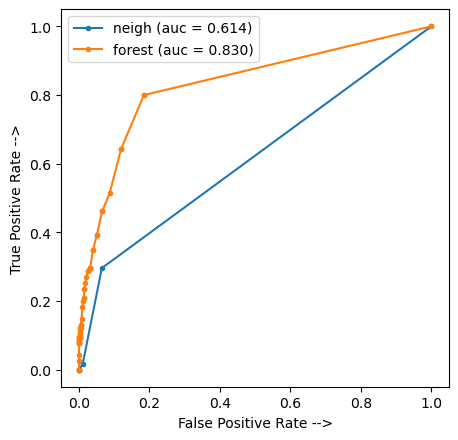

In [183]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# y_pred_logistic = y_pred_logistic[:,1]
y_pred_neigh = y_pred_neigh[:,1]
y_pred_forest= y_pred_forest[:,1]

# logistic_fpr, logistic_tpr, threshold_test = roc_curve(y_test, y_pred_logistic)
# auc_logistic = roc_auc_score(y_test, y_pred_logistic)

neigh_fpr, neigh_tpr, neigh_threshold = roc_curve(y_test, y_pred_neigh)
auc_neigh = roc_auc_score(y_test, y_pred_neigh)

forest_fpr, forest_tpr, forest_threshold = roc_curve(y_test, y_pred_forest)
auc_forest = roc_auc_score(y_test, y_pred_forest)

plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(neigh_fpr, neigh_tpr, marker='.', label='neigh (auc = %0.3f)' % auc_neigh)
plt.plot(forest_fpr, forest_tpr, marker='.', label='forest (auc = %0.3f)' % auc_forest)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [184]:
# print the correlation between the "is_cancelled" column and the other columns
print(data.corr()['is_cancelled'].sort_values(ascending=False)[:50])

is_cancelled                     1.000000
Lead_day                         0.092461
guest_national_Macau             0.054256
origin_country_code_MO           0.051798
stay_len                         0.034866
is_user_logged_in                0.025445
origin_country_code_HK           0.022100
original_selling_amount          0.020741
guest_national_Hong Kong         0.019758
no_of_children                   0.006981
request_extra_bed                0.003563
no_of_adults                     0.001315
no_of_room                      -0.001966
is_first_booking                -0.004283
hotel_star_rating               -0.008578
original_payment_type           -0.010545
guest_is_not_the_customer       -0.010688
type_hotel_Serviced Apartment   -0.012064
guest_national_Thailand         -0.012790
guest_national_Malaysia         -0.017311
origin_country_code_TH          -0.017482
origin_country_code_MY          -0.019134
number_of_requests              -0.020589
cancel_policy_365D100P_100P     -0